In [1]:
import pandas as pd

%store -r t

data = pd.read_csv('./fakeData/labelledDataSOM' + t + '.csv')
# X = data[['valueLog','sex', 'marketing','moveFreq', 'premsFreq', 'premsMedian','traceability']].to_numpy()
# X = data[['perno', 'sex', 'latitude', 'long', 'valueLog',
#    'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
#    'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

X = data[['sex', 'valueLog',
       'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
       'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']].to_numpy()

labels = data['cluster'].to_list()

columnnames = ['sex', 'valueLog',
       'marketing', 'moveFreq', 'moveDur', 'premsFreq', 'premsMean',
       'premsMax', 'premsMin', 'premsMedian', 'premsDur', 'traceability']

path = './vis'

   sex   valueLog  marketing  moveFreq  moveDur  premsFreq  premsMean  \
0  0.0  12.028720        1.0       1.0   6570.0       58.0    2176.51   
1  2.0   6.565265        0.0       1.0   6570.0        1.0     250.00   
2  0.0  10.322722        0.0       1.0   6570.0      216.0      96.51   
3  2.0   6.565265        1.0       1.0   6570.0        1.0     250.00   
4  2.0  10.020820        1.0       3.0   1822.0        6.0    2810.32   

   premsMax  premsMin  premsMedian  premsDur  traceability  cluster  
0   4615.00    240.74      2124.70     115.0      0.000000      0.0  
1    250.00    250.00       250.00    6570.0      0.000000      4.0  
2    438.05      2.98        86.05      30.0      0.531680      3.0  
3    250.00    250.00       250.00    6570.0      0.656537      4.0  
4   3785.99   1834.52      2805.93    1160.0      0.000000      2.0  


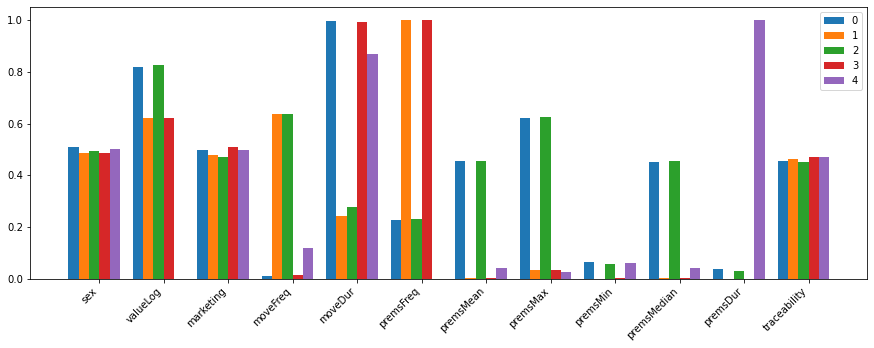

<Figure size 432x288 with 0 Axes>

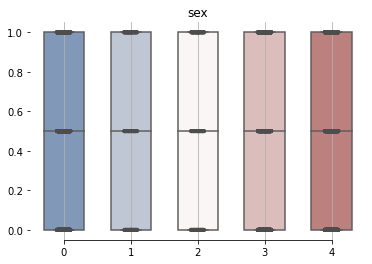

<Figure size 432x288 with 0 Axes>

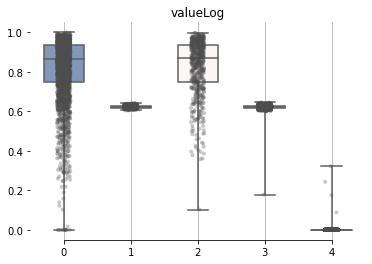

<Figure size 432x288 with 0 Axes>

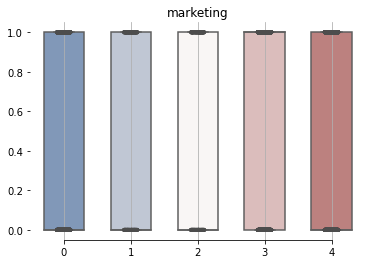

<Figure size 432x288 with 0 Axes>

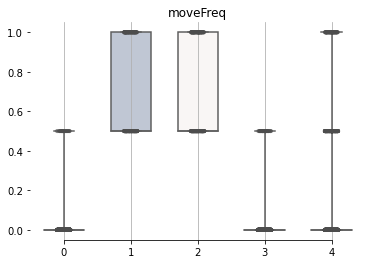

<Figure size 432x288 with 0 Axes>

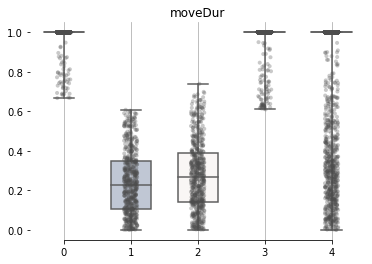

<Figure size 432x288 with 0 Axes>

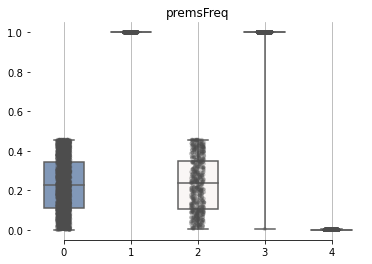

<Figure size 432x288 with 0 Axes>

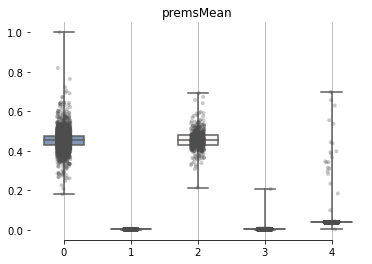

<Figure size 432x288 with 0 Axes>

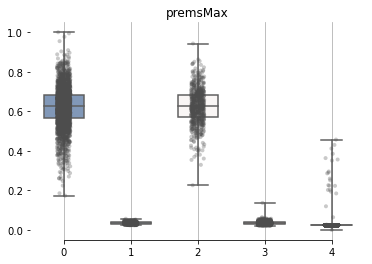

<Figure size 432x288 with 0 Axes>

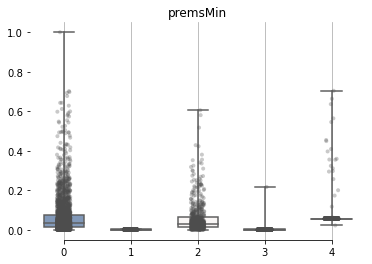

<Figure size 432x288 with 0 Axes>

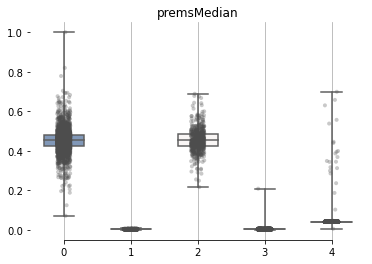

<Figure size 432x288 with 0 Axes>

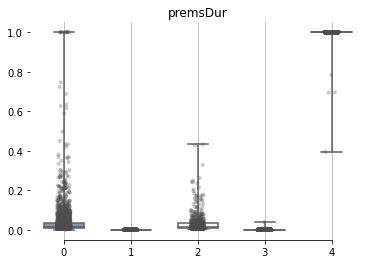

<Figure size 432x288 with 0 Axes>

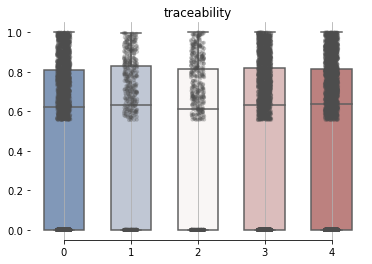

<Figure size 432x288 with 0 Axes>

In [2]:
from module.visual import averageBarchart, boxplot, pltHistwithMeans, pltNormalDistwithMeans, radarClus, parallelClus
from module.validateCluster import clusterSummary, featureImportanceStats

clustersummarydf = clusterSummary(X,columnnames, labels)
averageBarchart(X, labels, columnnames, path, show = True)
boxplot(X,labels, columnnames, path, show = True)

In [3]:
importance = featureImportanceStats(clustersummarydf, max(labels)+1, X)

Statistically
Cluster 0 has relatively high feature premsMean with mean value of 801.480793
Cluster 0 has relatively high feature premsMax with mean value of 1584.953634
Cluster 0 has relatively high feature premsMedian with mean value of 791.983216
Cluster 1 has relatively high feature moveFreq with mean value of 1.2434
Cluster 1 has relatively low feature moveDur with mean value of 5688.0136
Cluster 1 has relatively high feature premsFreq with mean value of 90.3794
Cluster 2 has relatively high feature moveFreq with mean value of 1.2434
Cluster 2 has relatively low feature moveDur with mean value of 5688.0136
Cluster 2 has relatively high feature premsMean with mean value of 801.480793
Cluster 2 has relatively high feature premsMax with mean value of 1584.953634
Cluster 2 has relatively high feature premsMedian with mean value of 791.983216
Cluster 3 has relatively high feature premsFreq with mean value of 90.3794
Cluster 4 has relatively low feature valueLog with mean value of 9.530

In [4]:
clustersummarydf

,sex,valueLog,marketing,moveFreq,moveDur,premsFreq,premsMean,premsMax,premsMin,premsMedian,premsDur,traceability
0,1.019058,11.530506,0.496944,1.019058,6542.208918,50.090974,2016.972661,4105.149184,275.622528,2000.288227,275.661992,0.411138
1,0.974916,10.348987,0.479933,2.277592,1596.657191,216.000000,99.582860,319.000401,6.523261,87.904548,30.000000,0.417498
2,0.991763,11.588715,0.472817,2.276771,1830.800659,51.003295,2025.047842,4137.247595,254.086540,2010.510132,237.085667,0.407499
3,0.971264,10.347106,0.508980,1.027658,6520.647270,215.923132,99.800546,319.519195,7.156555,88.030309,30.090876,0.424413
4,1.002167,6.566827,0.499690,1.236842,5717.236533,1.001238,259.754690,260.527396,258.981988,259.754690,6567.102167,0.424646


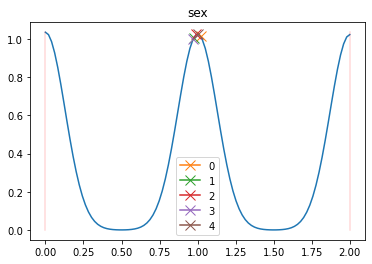

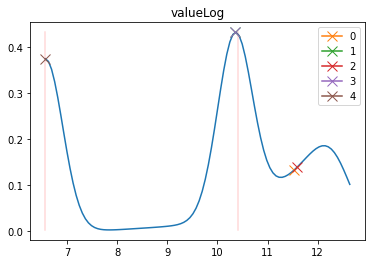

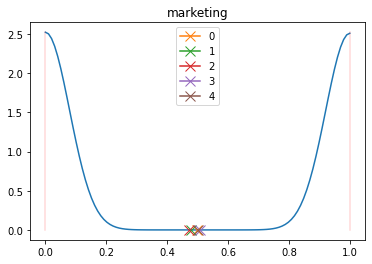

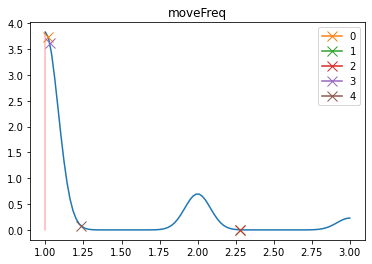

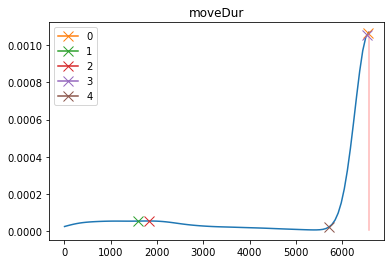

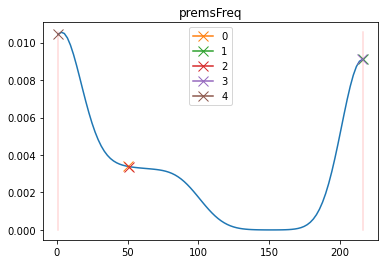

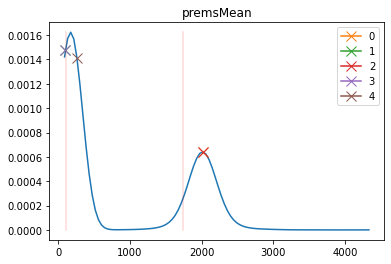

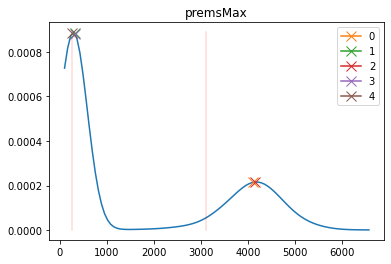

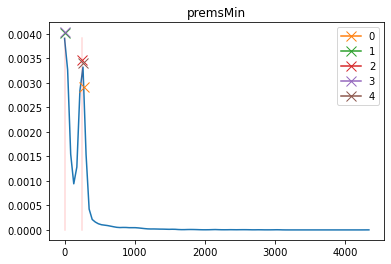

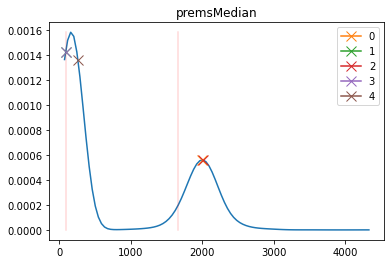

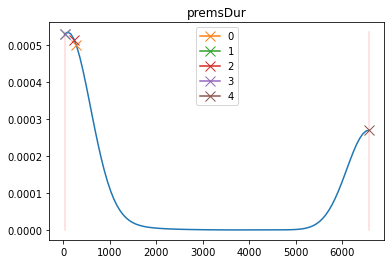

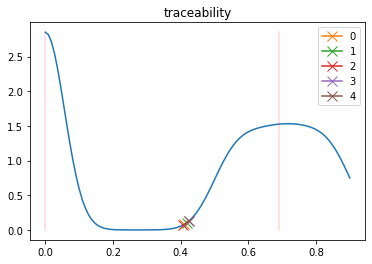

<Figure size 432x288 with 0 Axes>

In [5]:
pltHistwithMeans(clustersummarydf, X, path, show = True)

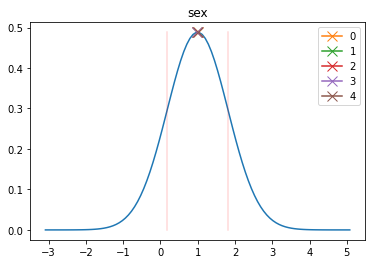

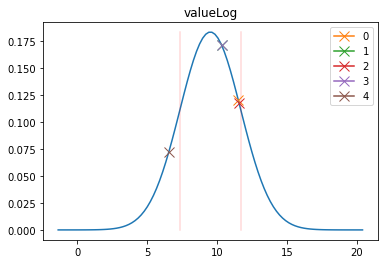

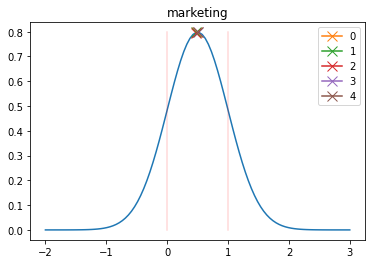

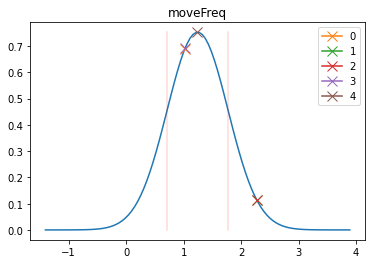

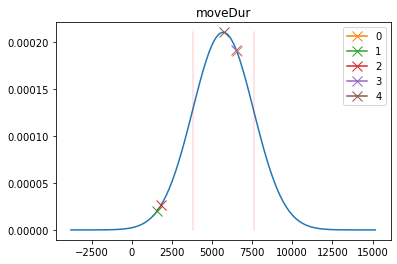

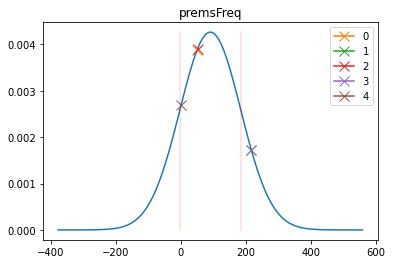

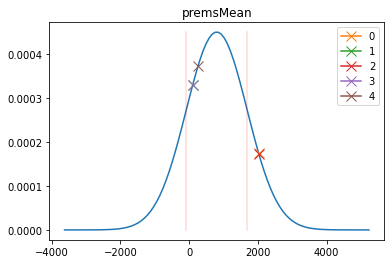

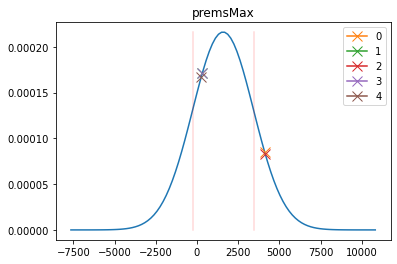

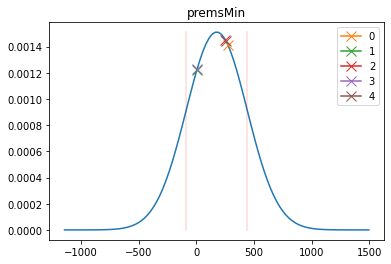

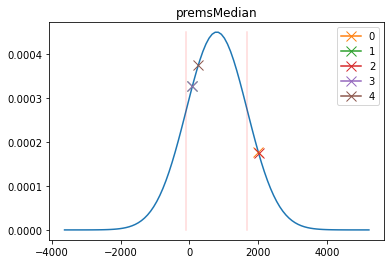

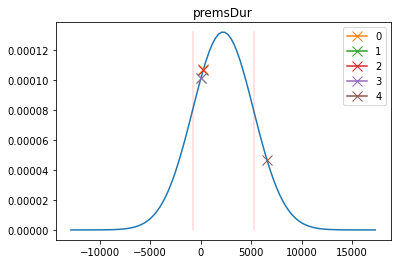

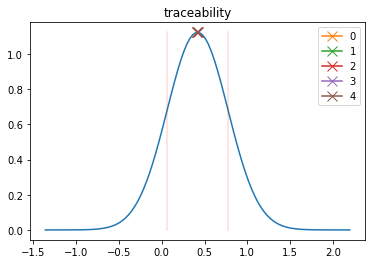

<Figure size 432x288 with 0 Axes>

In [6]:
pltNormalDistwithMeans(clustersummarydf, X, path, show = True)

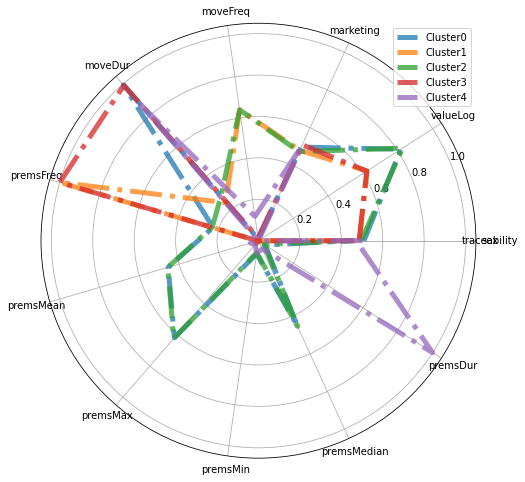

<Figure size 432x288 with 0 Axes>

In [7]:
radarClus(X, labels, columnnames, path, show = True)

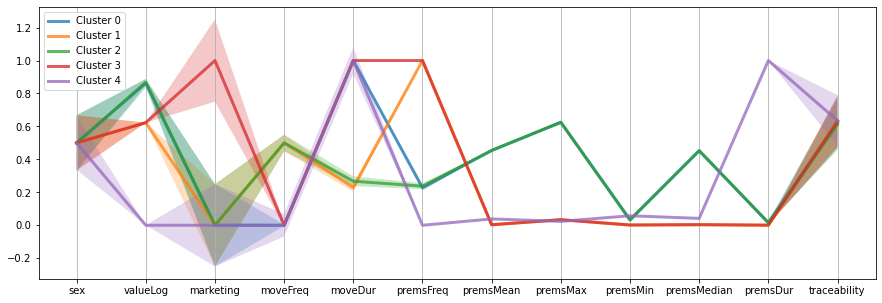

<Figure size 432x288 with 0 Axes>

In [8]:
parallelClus(X, labels, columnnames, path, show = True)

## Gone Aways

In [9]:
ga = data['goneAway'].to_list()
path = './vis/goneAway'

goneawaysummarydf = clusterSummary(X,columnnames, ga)

   sex   valueLog  marketing  moveFreq  moveDur  premsFreq  premsMean  \
0  0.0  12.028720        1.0       1.0   6570.0       58.0    2176.51   
1  2.0   6.565265        0.0       1.0   6570.0        1.0     250.00   
2  0.0  10.322722        0.0       1.0   6570.0      216.0      96.51   
3  2.0   6.565265        1.0       1.0   6570.0        1.0     250.00   
4  2.0  10.020820        1.0       3.0   1822.0        6.0    2810.32   

   premsMax  premsMin  premsMedian  premsDur  traceability  cluster  
0   4615.00    240.74      2124.70     115.0      0.000000      0.0  
1    250.00    250.00       250.00    6570.0      0.000000      0.0  
2    438.05      2.98        86.05      30.0      0.531680      0.0  
3    250.00    250.00       250.00    6570.0      0.656537      0.0  
4   3785.99   1834.52      2805.93    1160.0      0.000000      0.0  


In [10]:
goneawaysummarydf

,sex,valueLog,marketing,moveFreq,moveDur,premsFreq,premsMean,premsMax,premsMin,premsMedian,premsDur,traceability
0,0.998465,9.533261,0.499469,1.241408,5694.497106,90.339908,802.290887,1588.578615,177.910840,792.383794,2222.720090,0.416667
1,0.982387,9.516275,0.494455,1.254403,5652.204175,90.597521,797.006517,1564.932296,179.192616,789.770763,2220.619048,0.434208


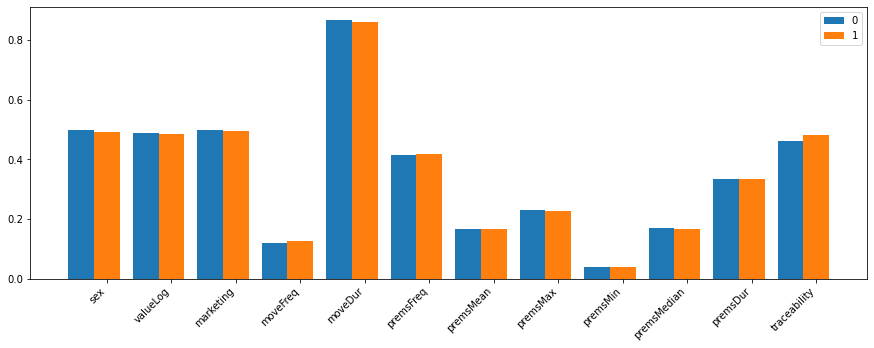

<Figure size 432x288 with 0 Axes>

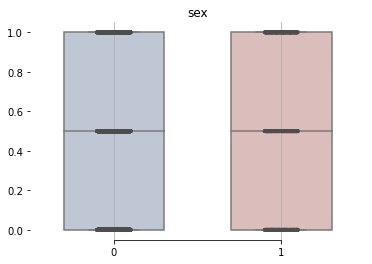

<Figure size 432x288 with 0 Axes>

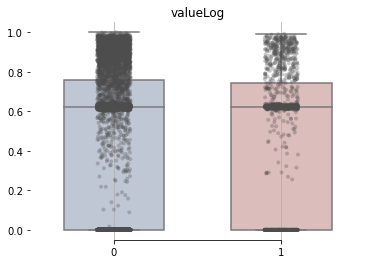

<Figure size 432x288 with 0 Axes>

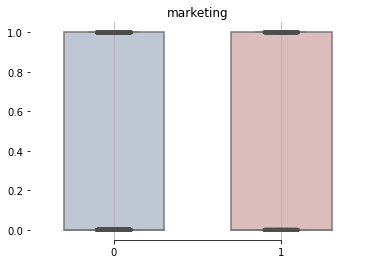

<Figure size 432x288 with 0 Axes>

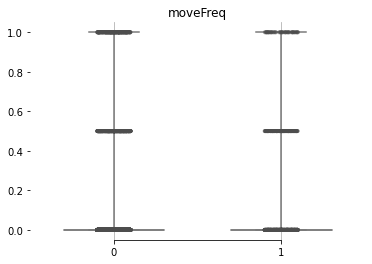

<Figure size 432x288 with 0 Axes>

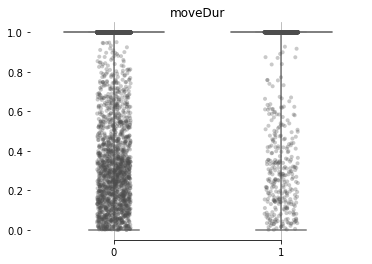

<Figure size 432x288 with 0 Axes>

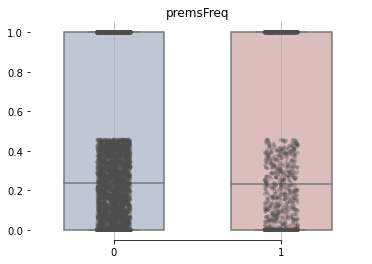

<Figure size 432x288 with 0 Axes>

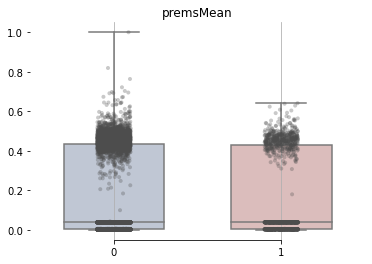

<Figure size 432x288 with 0 Axes>

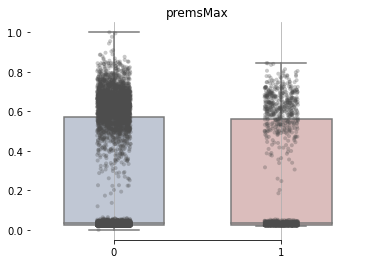

<Figure size 432x288 with 0 Axes>

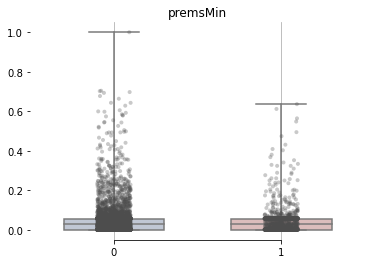

<Figure size 432x288 with 0 Axes>

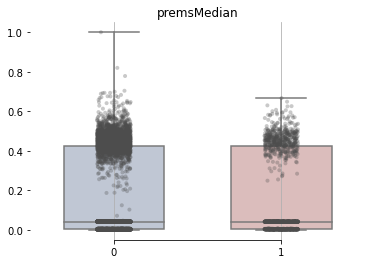

<Figure size 432x288 with 0 Axes>

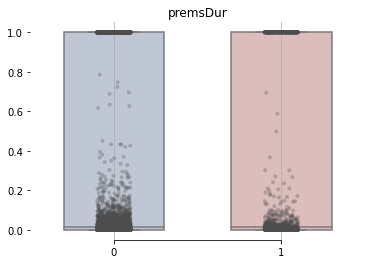

<Figure size 432x288 with 0 Axes>

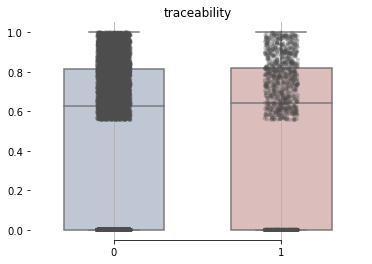

<Figure size 432x288 with 0 Axes>

In [11]:
averageBarchart(X, ga, columnnames, path, show = True)
boxplot(X,ga, columnnames, path, show = True)

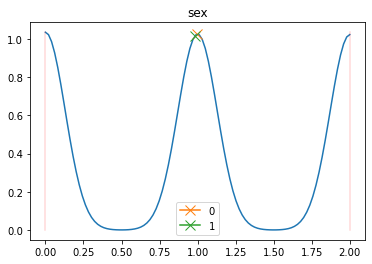

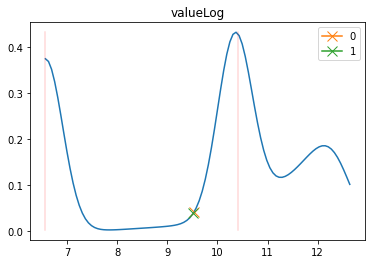

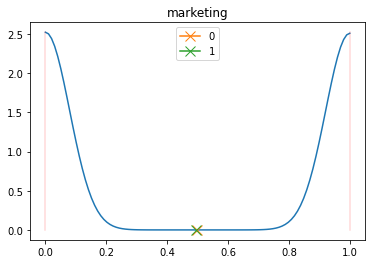

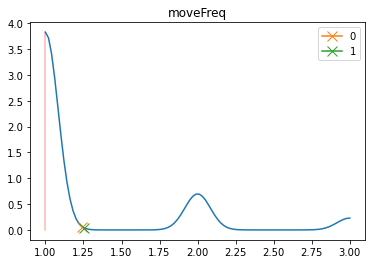

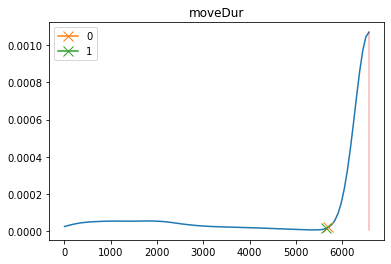

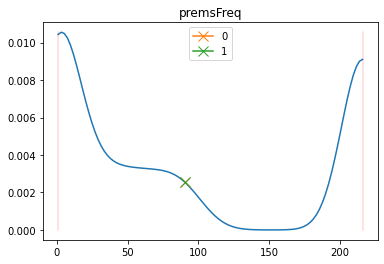

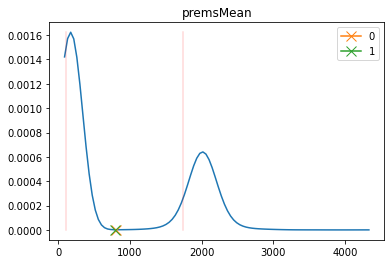

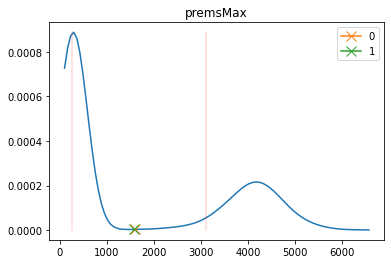

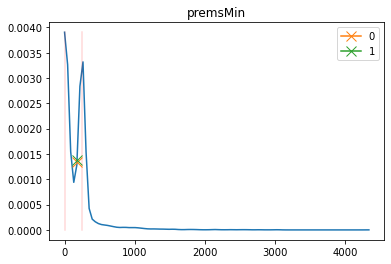

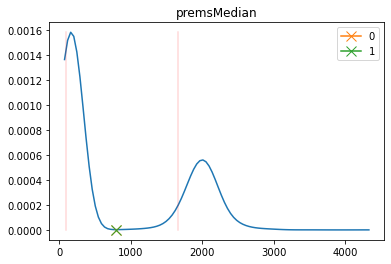

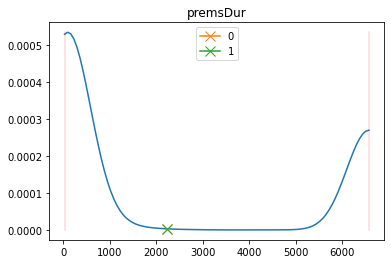

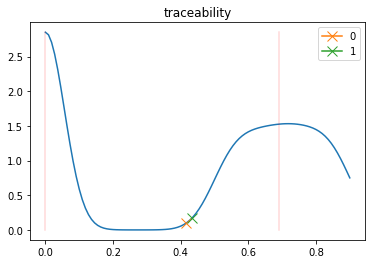

<Figure size 432x288 with 0 Axes>

In [12]:
pltHistwithMeans(goneawaysummarydf, X, path, show = True)

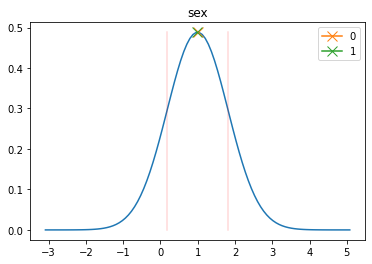

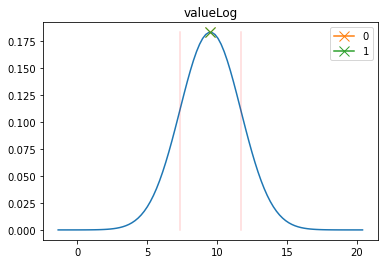

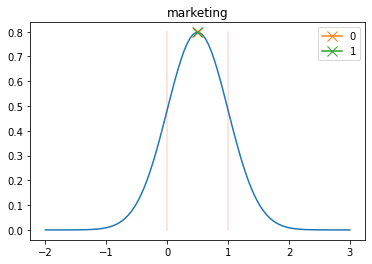

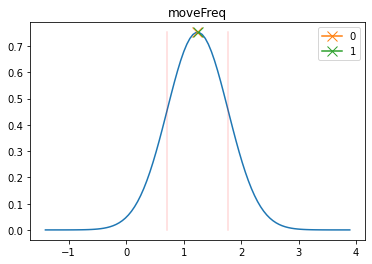

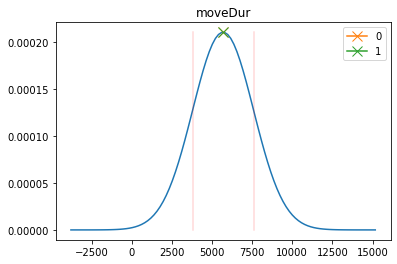

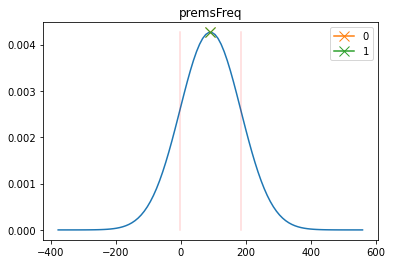

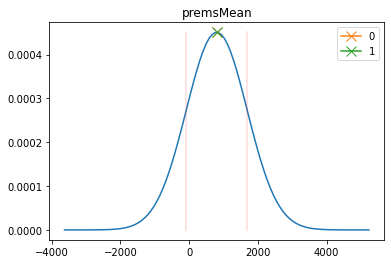

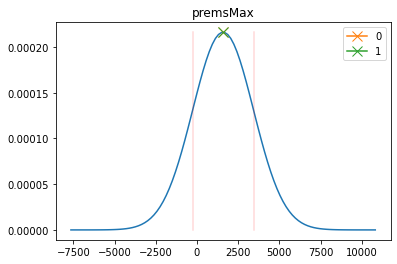

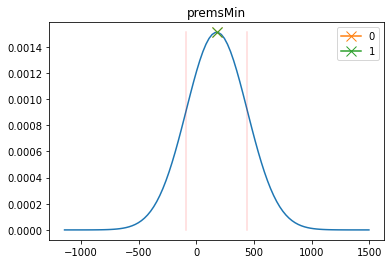

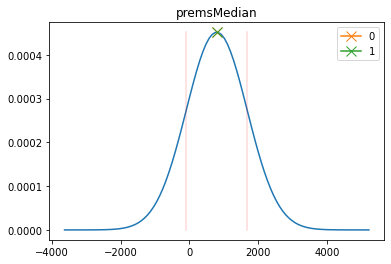

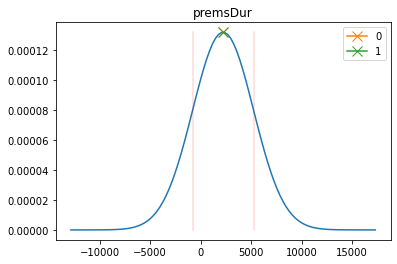

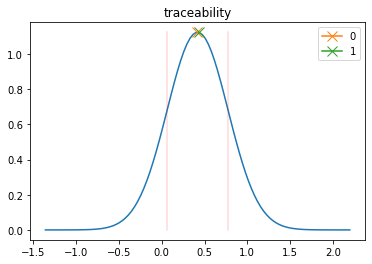

<Figure size 432x288 with 0 Axes>

In [13]:
pltNormalDistwithMeans(goneawaysummarydf, X, path, show = True)

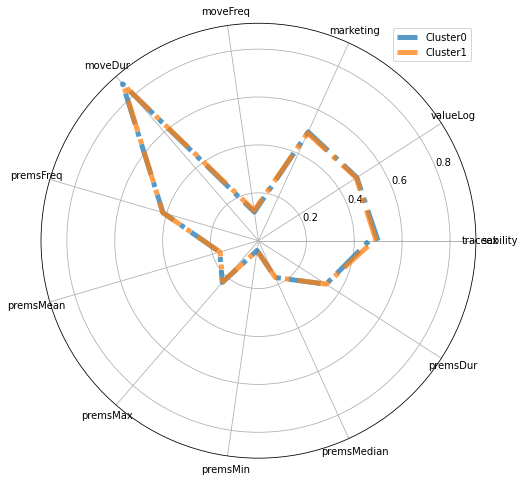

<Figure size 432x288 with 0 Axes>

In [14]:
radarClus(X, ga, columnnames, path, show = True)

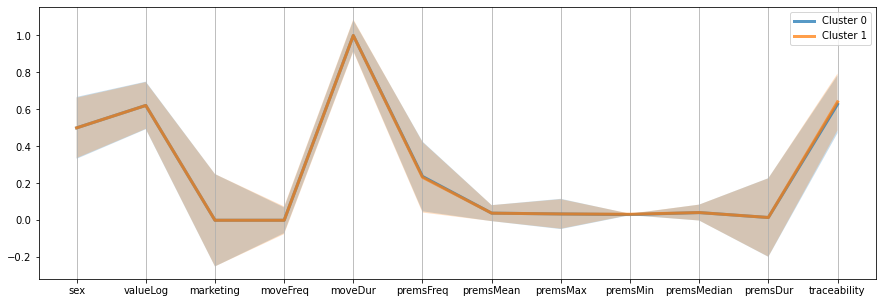

<Figure size 432x288 with 0 Axes>

In [15]:
parallelClus(X, ga, columnnames, path, show = True)